In [1]:
import numpy as np
from scipy.special import binom
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def bruteForce(CS, CG, PS, PG):
    likelihoods = []
    for OS in np.arange(CS + CG + 1):
        # Now loop over number of classified stars actually coming from the observed stars
        OG = CS + CG - OS
        CSFOS = np.max([CS - OG, 0])
        sumProb = 0
        while (CSFOS <= OS) & (CSFOS <= CS):
            sumProb += binom(OS, CSFOS) * (PS**(CSFOS)) * ((1-PS)**(OS-CSFOS)) * binom(OG, CS - CSFOS) * (PG**(OG - CS + CSFOS)) * ((1-PG)**(CS-CSFOS))
            CSFOS += 1
        likelihoods.append(sumProb)
    return np.array(likelihoods)

In [3]:
def likelihoodFormula(CS, CG, PS, PG):
    likelihoods = []
    for OS in np.arange(CS + CG + 1):
        PCS = (OS / (CS + CG)) * PS + ((CS + CG - OS) / (CS + CG)) * (1 - PG)
        prob = comb((CS + CG), CS) * (PCS**CS) * ((1 - PCS)**(CG))
        likelihoods.append(prob)
    return np.array(likelihoods)

In [4]:
CS = 5
CG = 20
PS = 0.8
PG = 0.9

In [5]:
bF = bruteForce(CS, CG, PS, PG)

In [6]:
lF = likelihoodFormula(CS, CG, PS, PG)

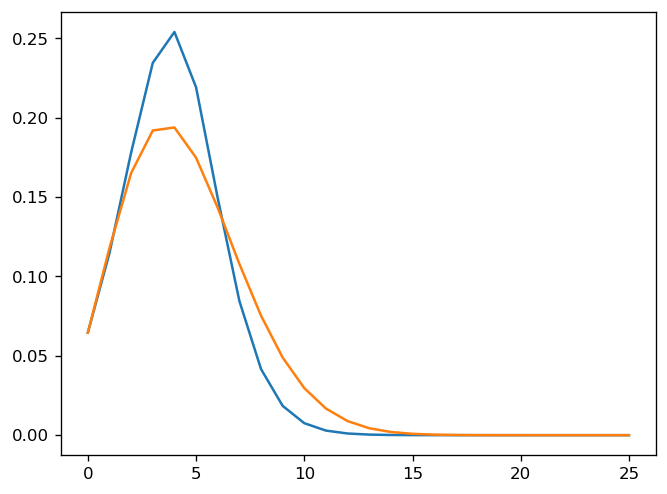

In [7]:
plt.figure(dpi = 120)
plt.plot(np.arange(26), bF)
plt.plot(np.arange(26), lF)
plt.show()

# Brute Force Check of Bad Point

In [8]:
OS = 4 # This was a point with large disagreement
totalCorrect = 0
for _ in np.arange(1000000):
    testStars = np.random.rand(OS)
    testGalaxies = np.random.rand(CS + CG - OS)
    if len(np.where(testStars < PS)[0]) + len(np.where(testGalaxies > PG)[0]) == CS:
        totalCorrect += 1

In [9]:
totalCorrect / 1000000

0.254303

In [10]:
lF[OS] # This is the combination method

0.19388466934856585

In [11]:
bF[OS] # This is the uglier method

0.2540483118593504

## Following Code

The following code is just a sanity check that the overall probability of classifying something as a star was correctly calculated, which it was.

In [12]:
totalStars = 0
for _ in np.arange(1000000):
    testStars = np.random.rand(OS)
    testGalaxies = np.random.rand(CS + CG - OS)
    totalStars += len(np.where(testStars < PS)[0]) + len(np.where(testGalaxies > PG)[0])

In [13]:
totalStars / (1000000 * (CS+CG))

0.2121198

In [14]:
(OS * PS + (CS+CG-OS) * (1-PG)) / (CS+CG)

0.212